# Load modules

In [17]:
import numpy as np
import pandas as pd
import matplotlib as mpl
from matplotlib import pyplot as plt
from matplotlib.cm import Blues
from matplotlib.ticker import MultipleLocator
from scipy.stats import chi2
import warnings
import json

# Variable and function definitions

In [21]:
# Custom colors
blue         = '#2a4d69'
red          = '#d90429'
orange       = '#E08300'
green        = '#3A7E5E'
purple       = '#71338c'
magenta      = '#ac3a76'
light_blue   = '#adcbe3'
light_red    = '#ffb3c1'
light_green  = '#95d5b2'
lavender     = '#c36ee6'
light_orange = '#ffc971'
light_pink   = '#e66ebf'

# Confidence levels
confidence_intervals_2D = (
                           chi2.isf(0.32, 2),  # 68% level
                           chi2.isf(0.10, 2),  # 90% level
                           chi2.isf(0.05, 2),  # 95% level
                          )
# Livetimes
LIVETIME = 3186 * 24 * 3600  # From IceCube NGC paper (2211.09972)
LIVETIME_YR = LIVETIME/3600/24/365
EXPOSURE_159 = 159/LIVETIME_YR
CONFIDENCE = 95/100

dH0=1.372e26/3e8 # Hubble distance [s]

In [24]:
# These functions plot the contours of the relevant likelihood for the confidence level defined above

# Contours produced assuming a power-law (PL) neutrino energy spectrum
def add_contour_pl(fix_ratios, prior_size, detector, exp_factor, ax, style, fill=False,alpha=1):
    # fname = f'output/profile_2d_decay1_vs_decay2_detector_{detector}_factor_{exp_factor}_fixratios_{fix_ratios}_with_norm_prior_{prior_size}.csv'
    fname = f'likelihood_data/ngc1068_likelihood/profile_2d_decay1_vs_decay2_detector_{detector}_factor_{exp_factor}_fixratios_{fix_ratios}_short_with_norm_prior_{prior_size}_with_tau.csv'
    df = pd.read_csv(fname)
    key1 = 'm2_tau2'
    key2 = 'm3_tau3'
    varname = 'delta_llh'
    best_fit = [df[df.delta_llh == df.delta_llh.min()][key1],
                df[df.delta_llh == df.delta_llh.min()][key2]
               ]
    var1 = np.array(df[key1])
    var2 = np.array(df[key2])
    delta_llh = np.array(df[varname])
    nbins = int(np.sqrt(len(var1)))
    # Converting to tau_m (livetime in units of neutrino mass)
    var1 = var1.reshape(nbins, nbins)*(-1)
    var2 = var2.reshape(nbins, nbins)*(-1)
    delta_llh = delta_llh.reshape(nbins, nbins)
    
    var1_1d = var1[:, 0]
    var2_1d = var2[0]
    
    if not fill:
        level = [chi2.isf(1-style['level'], 2)]
        contour = ax.contour(var1, var2, delta_llh,
                             levels=level,
                             colors=style['colors'],
                             
                             linestyles=style['ls'],
                             linewidths=style['lw'])
    else:
        level = [chi2.isf(1-style['level'], 2)]
        contour = ax.contour(var1, var2, delta_llh,
                             levels=level,
                             colors='w',
                             linestyles=style['ls'],
                             linewidths=1.5)
        level = [chi2.isf(1-style['level'], 2), delta_llh.max()]
        contour = ax.contourf(var1, var2, delta_llh,
                              levels=level,alpha=alpha,
                              **style)
    paths = contour.collections[0].get_paths()

    # Extract coordinates of the contour lines
    contour_points = [path.vertices for path in paths]

    return contour_points[0]


# Contours produced assuming a power-law-with-exponential-cut-off (PC) neutrino energy spectrum
def add_contour_plcut(fix_ratios, prior_size, detector, exp_factor, ax, style, fill=False,alpha=1):
    fname = f'likelihood_data/ngc1068_likelihood/profile_2d_decay1_vs_decay2_detector_{detector}_factor_{exp_factor}_fixratios_{fix_ratios}_short_with_norm_prior_{prior_size}_shape_broken_with_tau.csv'
    df = pd.read_csv(fname)
    key1 = 'm2_tau2'
    key2 = 'm3_tau3'
    varname = 'delta_llh'
    best_fit = [df[df.delta_llh == df.delta_llh.min()][key1],
                df[df.delta_llh == df.delta_llh.min()][key2]
               ]
    var1 = np.array(df[key1])
    var2 = np.array(df[key2])
    delta_llh = np.array(df[varname])
    nbins = int(np.sqrt(len(var1)))
    # Converting to tau_m (live time in units of neutrino mass)
    var1 = var1.reshape(nbins, nbins)*(-1)
    var2 = var2.reshape(nbins, nbins)*(-1)
    delta_llh = delta_llh.reshape(nbins, nbins)
    
    var1_1d = var1[:, 0]
    var2_1d = var2[0]
    
    if not fill:
        level = [chi2.isf(1-style['level'], 2)]
        contour = ax.contour(var1, var2, delta_llh,
                             levels=level,
                             colors=style['colors'],
                             linestyles=style['ls'],
                             linewidths=style['lw'])
    else:
        level = [chi2.isf(1-style['level'], 2)]
        contour = ax.contour(var1, var2, delta_llh,
                             levels=level,
                             colors='w',
                             linestyles=style['ls'],
                             linewidths=1.5)
        level = [chi2.isf(1-style['level'], 2), delta_llh.max()]
        contour = ax.contourf(var1, var2, delta_llh,
                              levels=level, alpha=alpha,
                              **style)
    paths = contour.collections[0].get_paths()

    # Extract coordinates of the contour lines
    contour_points = [path.vertices for path in paths]

    return contour_points[0]

# Helper
def L10(x):
    return np.log(x)/np.log(10)

# Neutrino lifetime bounds from NGC 1068

## Generate filled contour plot of $\tau_3/m_3$ vs. $\tau_2/m_2$

The code below produces Fig. 5 in arXiv:XXXX.XXXX.

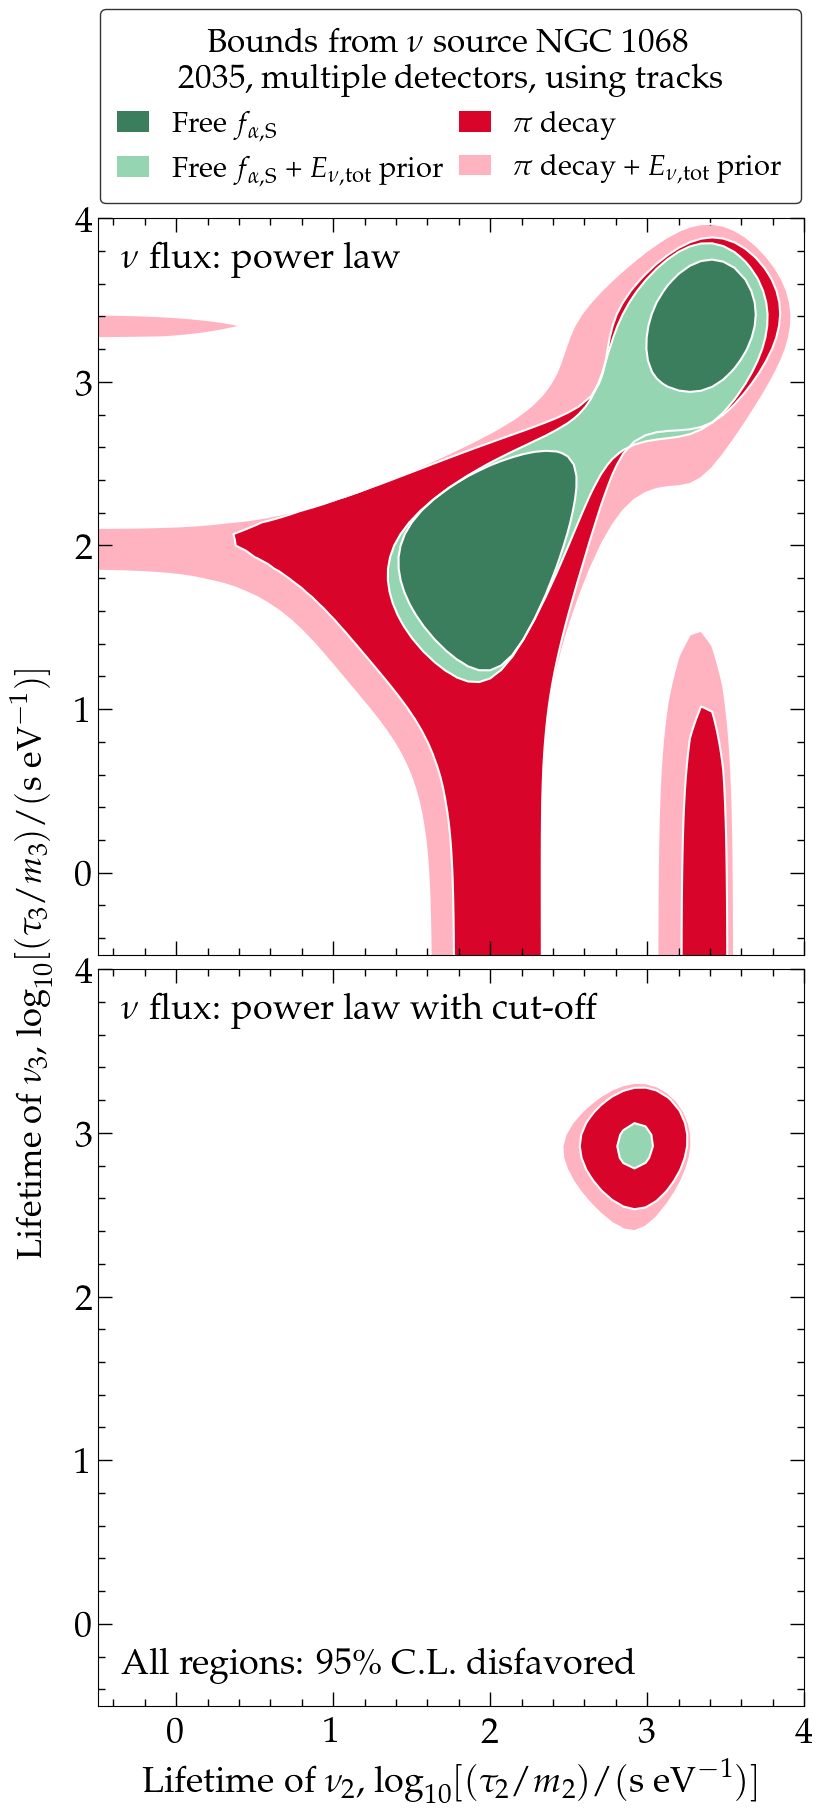

In [26]:
# Temporarily turn off warnings
warnings.filterwarnings("ignore", category=UserWarning)
warnings.filterwarnings("ignore", category=mpl.MatplotlibDeprecationWarning)

add_contour1 = add_contour_pl
add_contour2 = add_contour_plcut

fig, axs = plt.subplots(2, 1,figsize=(9,18))

plt.subplots_adjust(wspace=0.01, hspace=0.02)  
ax1,ax2=axs[0],axs[1]

ax1.set_xticklabels([])

detector = 'IceCube'
exp_factor = EXPOSURE_159
confidence_level = CONFIDENCE 

# PL model

fix_ratios = True
prior_size = 0.5
style = {'colors': light_red, 'ls':'-', 'lw': 2.0, 'level': confidence_level}
ct_pl_prior=add_contour1(fix_ratios=fix_ratios, prior_size=prior_size, detector=detector, exp_factor=exp_factor,
            ax=ax1, style=style, fill=True, alpha=1.0)

fix_ratios = True
prior_size = None
style = {'colors': red, 'ls':'-', 'lw': 2.0, 'level': confidence_level}
ct_pl_noprior=add_contour1(fix_ratios=fix_ratios, prior_size=prior_size, detector=detector, exp_factor=exp_factor,
            ax=ax1, style=style, fill=True, alpha=1.0)

fix_ratios = False
prior_size = 0.5
style = {'colors': light_green, 'ls':'-', 'lw': 2.0, 'level': confidence_level}
ct_pl_prior_freeflavor=add_contour1(fix_ratios=fix_ratios, prior_size=prior_size, detector=detector, exp_factor=exp_factor,
            ax=ax1, style=style, fill=True, alpha=1.0)

fix_ratios = False
prior_size = None
style = {'colors': green, 'ls':'-', 'lw': 2.0, 'level': confidence_level}
ct_pl_noprior_freeflavor=add_contour1(fix_ratios=fix_ratios, prior_size=prior_size, detector=detector, exp_factor=exp_factor,
            ax=ax1, style=style, fill=True)

# PC model

fix_ratios = True
prior_size = 0.5
style = {'colors': light_red, 'ls':'-', 'lw': 2.0, 'level': confidence_level}
ct_cut_prior=add_contour2(fix_ratios=fix_ratios, prior_size=prior_size, detector=detector, exp_factor=exp_factor,
            ax=ax2, style=style, fill=True, alpha=1.0)

fix_ratios = True
prior_size = None
style = {'colors': red, 'ls':'-', 'lw': 2.0, 'level': confidence_level}
ct_cut_noprior=add_contour2(fix_ratios=fix_ratios, prior_size=prior_size, detector=detector, exp_factor=exp_factor,
            ax=ax2, style=style, fill=True, alpha=1.0)


fix_ratios = False
prior_size = 0.5
style = {'colors': light_green, 'ls':'-', 'lw': 2.0, 'level': confidence_level}
ct_cut_prior_freeflavor=add_contour2(fix_ratios=fix_ratios, prior_size=prior_size, detector=detector, exp_factor=exp_factor,
            ax=ax2, style=style, fill=True, alpha=1.0)

for ax in [ax1, ax2]:
    ax.set_xlim(-.5, 4.0)
    ax.set_ylim(-.5, 4.0)
    ax.xaxis.set_major_locator(MultipleLocator(1.0))
    ax.xaxis.set_minor_locator(MultipleLocator(0.2))
    ax.yaxis.set_major_locator(MultipleLocator(1.0))
    ax.yaxis.set_minor_locator(MultipleLocator(0.2))

proxy_artists = [plt.Rectangle((0,0),1,1,fc=green,alpha=1.0),
                 plt.Rectangle((0,0),1,1,fc=light_green,alpha=1.0),
                 plt.Rectangle((0,0),1,1,fc=red),
                 plt.Rectangle((0,0),1,1,fc=light_red,alpha=1.0),]

labels = [r'Free $f_{\alpha, {\rm S}}$',
          r'Free $f_{\alpha, {\rm S}}$ + $E_{\nu, {\rm tot}}$ prior',
          r'$\pi$ decay',
          r'$\pi$ decay + $E_{\nu, {\rm tot}}$ prior',]
ax1.legend(proxy_artists, 
           labels,
           fontsize=21,
           loc=[0.003,1.02],
           frameon=True,
           handlelength=1.1, handleheight=0.7,
           borderpad=0.6, handletextpad=0.78, ncol=2,
           columnspacing=0.5,
           title=r'~Bounds from $\nu$ source NGC 1068 \\[0.3em] 2035, multiple detectors, using tracks',
           title_fontsize=24, labelspacing=0.5,
           edgecolor='k')

ax2.set_xlabel(r'Lifetime of $\nu_2$, $\log_{10} [(\tau_2/m_2) / ({\rm s}~{\rm eV}^{-1})]$',
               fontsize=26)

fig.add_subplot(111, frameon=False)
plt.tick_params(labelcolor='none', top=False, bottom=False, left=False, right=False)
plt.ylabel(r'Lifetime of $\nu_3$, $\log_{10} [(\tau_3/m_3) / ({\rm s}~{\rm eV}^{-1})]$', 
    labelpad=0)

ax1.tick_params(axis='both', labelsize=26)
ax2.tick_params(axis='both', labelsize=26)

ax1.text(-0.35,3.7,r'$\nu$ flux: power law',fontsize=26)
ax2.text(-0.35,3.7,r'$\nu$ flux: power law with cut-off',fontsize=26)
ax2.text(-0.35,-0.3,'All regions: 95\%~C.L. disfavored', fontsize=26)

# Save plot
plt.savefig('./plots/bounds_ngc1068.pdf', bbox_inches='tight', dpi=300)

# Turn warnings back on
warnings.filterwarnings("default", category=UserWarning)
warnings.filterwarnings("default", category=mpl.MatplotlibDeprecationWarning)

## Extract and save contours

The code below extracts the confidence-level contours from the plot above and saves them as JSON files.

The contours have already been precomputed and are provided inside the folder `digitized_contours/ngc1068_contours/`.

In [6]:
# Power-law, no prior, fixed flavor ratio
region1 = ct_pl_prior[:273]  
region2 = ct_pl_prior[273:352]
region3 = ct_pl_prior[352:]
region1_dict = {'region1': region1.tolist()}
region2_dict = {'region2': region2.tolist()}
region3_dict = {'region3': region3.tolist()}
combined_dict = {**region1_dict, **region2_dict, **region3_dict}
with open('digitized_contours/ngc1068_data/PL_Prior_FixedFlavor.json', 'w') as json_file:
    json.dump(combined_dict, json_file)
    
# Power-law, prior, fixed flavor ratio
region1 = ct_pl_noprior[:235]  
region2 = ct_pl_noprior[235:]
region1_dict = {'region1': region1.tolist()}
region2_dict = {'region2': region2.tolist()}
combined_dict = {**region1_dict, **region2_dict}
with open('digitized_contours/ngc1068_data/PL_NoPrior_FixedFlavor.json', 'w') as json_file:
    json.dump(combined_dict, json_file)
    
# Power-law, no prior, free flavor ratio
region1 = ct_pl_noprior_freeflavor[:41]  
region2 = ct_pl_noprior_freeflavor[41:]
region1_dict = {'region1': region1.tolist()}
region2_dict = {'region2': region2.tolist()}
combined_dict = {**region1_dict, **region2_dict}
with open('digitized_contours/ngc1068_data/PL_NoPrior_FreeFlavor.json', 'w') as json_file:
    json.dump(combined_dict, json_file)
    
# Power-law, prior, fixed flavor ratio
region1 = ct_pl_prior_freeflavor 
region1_dict = {'region1': region1.tolist()}
combined_dict = {**region1_dict}
with open('digitized_contours/ngc1068_data/PL_Prior_FreeFlavor.json', 'w') as json_file:
    json.dump(combined_dict, json_file)

#Power-law + cut, prior, fixed flavor ratio
region1 = ct_cut_prior
region1_dict = {'region1': region1.tolist()}
combined_dict = {**region1_dict}
with open('digitized_contours/ngc1068_data/PLCut_Prior_FixedFlavor.json', 'w') as json_file:
    json.dump(combined_dict, json_file)
    
#Power-law + cut, no prior, fixed flavor ratio
region1 = ct_cut_noprior
region1_dict = {'region1': region1.tolist()}
combined_dict = {**region1_dict}
with open('digitized_contours/ngc1068_data/PLCut_NoPrior_FixedFlavor.json', 'w') as json_file:
    json.dump(combined_dict, json_file)
    
#Power-law + cut, prior, free flavor ratio
region1 = ct_cut_prior_freeflavor
region1_dict = {'region1': region1.tolist()}
combined_dict = {**region1_dict}
with open('digitized_contours/ngc1068_data/PLCut_Prior_FreeFlavor.json', 'w') as json_file:
    json.dump(combined_dict, json_file)

# Neutrino lifetimes bounds from the diffuse neutrino flux

## Load precomputed likelihood data

In [19]:
# Here we load the precomputed grid for the logarithms of (tau2/m2, tau3/m3) (lifetime over mass) 
# and the corresponding log-likelihood

# Diffuse flux: one source population (1P), SFR redshift evolution, present data
taulog1popSFRreal = np.load('likelihood_data/diffuse_likelihood/1popSFR2024_tau.npy')
likelids1popSFRreal = np.load('likelihood_data/diffuse_likelihood/1popSFR2024_likelihood.npy')

# Diffuse flux: two source populations (2P), SFR redshift evolution, present data
taulog2popSFRreal = np.load('likelihood_data/diffuse_likelihood/2popSFR2024_tau.npy')
likelids2popSFRreal = np.load('likelihood_data/diffuse_likelihood/2popSFR2024_likelihood.npy')

# Diffuse flux: one source population (1P), SFR redshift evolution, 2035 projection
taulog1popSFR159 = np.load('likelihood_data/diffuse_likelihood/1popSFR2035_tau.npy')
likelids1popSFR159 = np.load('likelihood_data/diffuse_likelihood/1popSFR2035_likelihood.npy')

# Diffuse flux: two source populations (2P), SFR redshift evolution, 2035 projection
taulog2popSFR159 = np.load('likelihood_data/diffuse_likelihood/2popSFR2035_tau.npy')
likelids2popSFR159 = np.load('likelihood_data/diffuse_likelihood/2popSFR2035_likelihood.npy')

# Diffuse flux: one source population (1P), BL Lac redshift evolution, present data
taulog1popBLLacreal = np.load('likelihood_data/diffuse_likelihood/1popBL2024_tau.npy')
likelids1popBLLacreal = np.load('likelihood_data/diffuse_likelihood/1popBL2024_likelihood.npy')

# Diffuse flux: two source populations (2P), BL Lac redshift evolution, present data
taulog2popBLLacreal = np.load('likelihood_data/diffuse_likelihood/2popBL2024_tau.npy')
likelids2popBLLacreal = np.load('likelihood_data/diffuse_likelihood/2popBL2024_likelihood.npy')

# Diffuse flux: one source population (1P), BL Lac redshift evolution, 2035 projection
taulog1popBLLac159 = np.load('likelihood_data/diffuse_likelihood/1popBL2035_tau.npy')
likelids1popBLLac159 = np.load('likelihood_data/diffuse_likelihood/1popBL2035_likelihood.npy')

# Diffuse flux: two source populations (2P), BL Lac redshift evolution, 2035 projection
taulog2popBLLac159 = np.load('likelihood_data/diffuse_likelihood/2popBL2035_tau.npy')
likelids2popBLLac159 = np.load('likelihood_data/diffuse_likelihood/2popBL2035_likelihood.npy')

## Generate filled contour plot of $\tau_3/m_3$ vs. $\tau_2/m_2$

The code below produces Fig. 6 in arXiv:XXXX.XXXX.

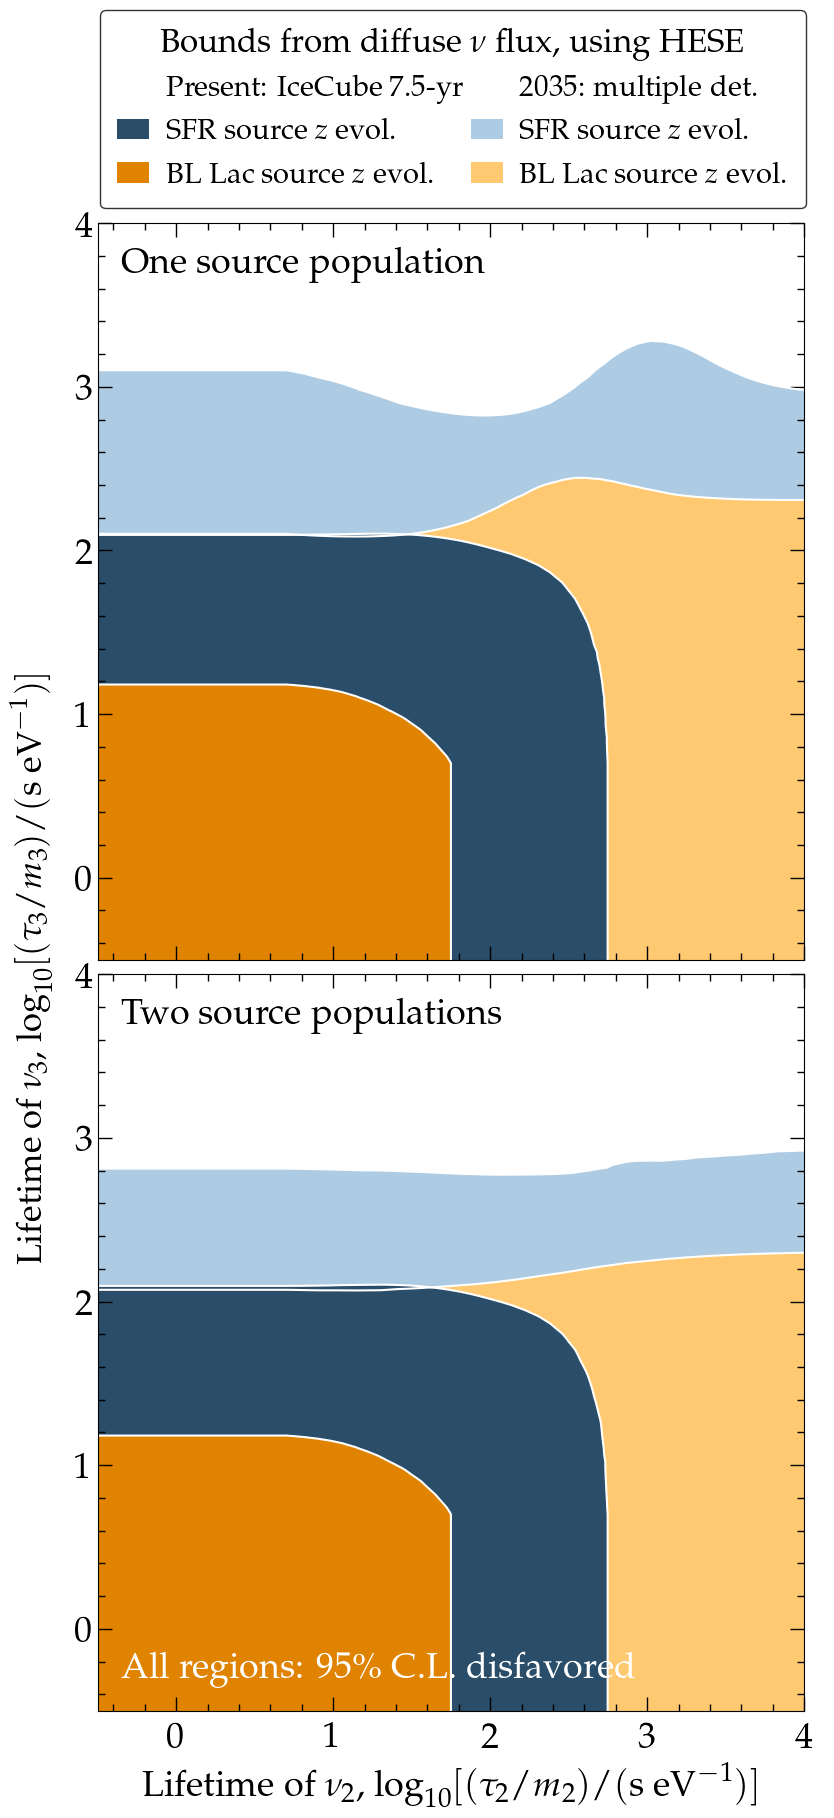

In [27]:
# Temporarily turn off warnings
warnings.filterwarnings("ignore", category=UserWarning)
warnings.filterwarnings("ignore", category=mpl.MatplotlibDeprecationWarning)

add_contour1 = add_contour_pl
add_contour2 = add_contour_plcut

fig, axs = plt.subplots(2, 1,figsize=(9,18))

plt.subplots_adjust(wspace=0.01, hspace=0.02)  # Adjust these values as needed
ax1,ax2=axs[0],axs[1]

ax1.set_xticklabels([])

detector = 'IceCube'
exp_factor = EXPOSURE_159
confidence_level = CONFIDENCE 

# --- 1P model ----------------------------------------------

CS1=ax1.contour(L10(dH0/(10**taulog1popSFR159[:,:,0]*1e9)),
                L10(dH0/(10**taulog1popSFR159[:,:,1]*1e9)),
                2*(likelids1popSFR159-np.amin(likelids1popSFR159)),
                levels=[4.7],
                colors='w',linestyles='-')
ax1.contourf(L10(dH0/(10**taulog1popSFR159[:,:,0]*1e9)),
             L10(dH0/(10**taulog1popSFR159[:,:,1]*1e9)),
             2*(likelids1popSFR159-np.amin(likelids1popSFR159)),
             levels=[4.7,1000],
             colors=light_blue, alpha=1.0)
paths = CS1.collections[0].get_paths()

# Extract coordinates of the contour lines
contour_points = [path.vertices for path in paths]
ct_1P_SFR_2035=contour_points[0]
CS1=ax1.contour(L10(dH0/(10**taulog1popBLLac159[:,:,0]*1e9)),
                L10(dH0/(10**taulog1popBLLac159[:,:,1]*1e9)),
                2*(likelids1popBLLac159-np.amin(likelids1popBLLac159)),
                levels=[4.7],
                colors='w',linestyles='-')
ax1.contourf(L10(dH0/(10**taulog1popBLLac159[:,:,0]*1e9)),
             L10(dH0/(10**taulog1popBLLac159[:,:,1]*1e9)),
             2*(likelids1popBLLac159-np.amin(likelids1popBLLac159)),
             levels=[4.7,1000],
             colors=light_orange, alpha=1.0)
paths = CS1.collections[0].get_paths()

# Extract coordinates of the contour lines
contour_points = [path.vertices for path in paths]
ct_1P_BLLac_2035=contour_points[0]
CS1=ax1.contour(L10(dH0/(10**taulog1popSFRreal[:,:,0]*1e9)),
                L10(dH0/(10**taulog1popSFRreal[:,:,1]*1e9)),
                2*(likelids1popSFRreal-np.amin(likelids1popSFRreal)),
                levels=[4.7],
                colors='w')
ax1.contourf(L10(dH0/(10**taulog1popSFRreal[:,:,0]*1e9)),
             L10(dH0/(10**taulog1popSFRreal[:,:,1]*1e9)),
             2*(likelids1popSFRreal-np.amin(likelids1popSFRreal)),
             levels=[4.7,1000],
             colors=blue, alpha=1.0)

paths = CS1.collections[0].get_paths()

# Extract coordinates of the contour lines
contour_points = [path.vertices for path in paths]
ct_1P_SFR_2024=contour_points[0]
CS1=ax1.contour(L10(dH0/(10**taulog1popBLLacreal[:,:,0]*1e9)),
                L10(dH0/(10**taulog1popBLLacreal[:,:,1]*1e9)),
                2*(likelids1popBLLacreal-np.amin(likelids1popBLLacreal)),
                levels=[4.7],
                colors='w')
ax1.contourf(L10(dH0/(10**taulog1popBLLacreal[:,:,0]*1e9)),
             L10(dH0/(10**taulog1popBLLacreal[:,:,1]*1e9)),
             2*(likelids1popBLLacreal-np.amin(likelids1popBLLacreal)),
             levels=[4.7,1000],
             colors=orange)
paths = CS1.collections[0].get_paths()

# Extract coordinates of the contour lines
contour_points = [path.vertices for path in paths]
ct_1P_BLLac_2024=contour_points[0]

# --- 2P model ----------------------------------------------

CS1=ax2.contour(L10(dH0/(10**taulog2popSFR159[:,:,0]*1e9)),
                L10(dH0/(10**taulog2popSFR159[:,:,1]*1e9)),
                2*(likelids2popSFR159-np.amin(likelids2popSFR159)),
                levels=[4.7],
                colors='w',linestyles='-')
ax2.contourf(L10(dH0/(10**taulog2popSFR159[:,:,0]*1e9)),
             L10(dH0/(10**taulog2popSFR159[:,:,1]*1e9)),
             2*(likelids2popSFR159-np.amin(likelids2popSFR159)),
             levels=[4.7,1000],
             colors=light_blue, alpha=1.0)
paths = CS1.collections[0].get_paths()

# Extract coordinates of the contour lines
contour_points = [path.vertices for path in paths]
ct_2P_SFR_2035=contour_points[0]
CS1=ax2.contour(L10(dH0/(10**taulog2popBLLac159[:,:,0]*1e9)),
                L10(dH0/(10**taulog2popBLLac159[:,:,1]*1e9)),
                2*(likelids2popBLLac159-np.amin(likelids1popBLLac159)),
                levels=[4.7],
                colors='w',linestyles='-')
ax2.contourf(L10(dH0/(10**taulog2popBLLac159[:,:,0]*1e9)),
             L10(dH0/(10**taulog2popBLLac159[:,:,1]*1e9)),
             2*(likelids2popBLLac159-np.amin(likelids1popBLLac159)),
             levels=[4.7,1000],
             colors=light_orange, alpha=1.0)
paths = CS1.collections[0].get_paths()

# Extract coordinates of the contour lines
contour_points = [path.vertices for path in paths]
ct_2P_BLLac_2035=contour_points[0]
CS1=ax2.contour(L10(dH0/(10**taulog2popSFRreal[:,:,0]*1e9)),
                L10(dH0/(10**taulog2popSFRreal[:,:,1]*1e9)),
                2*(likelids2popSFRreal-np.amin(likelids2popSFRreal)),
                levels=[4.7],
                colors='w')
ax2.contourf(L10(dH0/(10**taulog2popSFRreal[:,:,0]*1e9)),
             L10(dH0/(10**taulog2popSFRreal[:,:,1]*1e9)),
             2*(likelids2popSFRreal-np.amin(likelids2popSFRreal)),
             levels=[4.7,1000],
             colors=blue, alpha=1.0)
paths = CS1.collections[0].get_paths()

# Extract coordinates of the contour lines
contour_points = [path.vertices for path in paths]
ct_2P_SFR_2024=contour_points[0]
CS1=ax2.contour(L10(dH0/(10**taulog2popBLLacreal[:,:,0]*1e9)),
                L10(dH0/(10**taulog2popBLLacreal[:,:,1]*1e9)),
                2*(likelids2popBLLacreal-np.amin(likelids2popBLLacreal)),
                levels=[4.7],
                colors='w')
ax2.contourf(L10(dH0/(10**taulog2popBLLacreal[:,:,0]*1e9)),
             L10(dH0/(10**taulog2popBLLacreal[:,:,1]*1e9)),
             2*(likelids2popBLLacreal-np.amin(likelids2popBLLacreal)),
             levels=[4.7,1000],
             colors=orange)
paths = CS1.collections[0].get_paths()

# Extract coordinates of the contour lines
contour_points = [path.vertices for path in paths]
ct_2P_BLLac_2024=contour_points[0]

# Plot
for ax in [ax1, ax2]:
    ax.set_xlim(-.5, 4.0)
    ax.set_ylim(-.5, 4.0)
    ax.xaxis.set_major_locator(MultipleLocator(1.0))
    ax.xaxis.set_minor_locator(MultipleLocator(0.2))
    ax.yaxis.set_major_locator(MultipleLocator(1.0))
    ax.yaxis.set_minor_locator(MultipleLocator(0.2))

proxy_artists = [plt.Rectangle((0,0),1,1,fc='w'),
                 plt.Rectangle((0,0),1,1,fc=blue),
                 plt.Rectangle((0,0),1,1,fc=orange,alpha=1.0),
                 plt.Rectangle((0,0),1,1,fc='w'),
                 plt.Rectangle((0,0),1,1,fc=light_blue,alpha=1.0),
                 plt.Rectangle((0,0),1,1,fc=light_orange,alpha=1.0)]
labels = [r'Present: IceCube 7.5-yr',
          r'SFR source~$z$~evol.',
          r'BL Lac source~$z$~evol.',
          '2035: multiple det.',
          r'SFR source~$z$~evol.',
          r'BL Lac source~$z$~evol.']
ax1.legend(proxy_artists, 
           labels,
           fontsize=21,
           loc=[0.003,1.02],
           frameon=True,
           handlelength=1.1, handleheight=0.7,
           borderpad=0.6, handletextpad=0.55, ncol=2,
           columnspacing=0.30,
           title=r'Bounds from diffuse $\nu$ flux, using HESE',
           title_fontsize=24, labelspacing=0.5,
           edgecolor='k')

ax2.set_xlabel(r'Lifetime of $\nu_2$, $\log_{10} [(\tau_2/m_2) / ({\rm s}~{\rm eV}^{-1})]$',
               fontsize=26)

fig.add_subplot(111, frameon=False)
plt.tick_params(labelcolor='none', top=False, bottom=False, left=False, right=False)
plt.ylabel(r'Lifetime of $\nu_3$, $\log_{10} [(\tau_3/m_3) / ({\rm s}~{\rm eV}^{-1})]$', 
    labelpad=0)

ax1.tick_params(axis='both', labelsize=26)
ax2.tick_params(axis='both', labelsize=26)

ax1.text(-0.35,3.7,r'One source population',fontsize=26)
ax2.text(-0.35,3.7,r'Two source populations',fontsize=26)
ax2.text(-0.35,-0.3,'All regions: 95\%~C.L. disfavored', c='w', fontsize=26)

# Save plot
plt.savefig('./plots/bounds_diffuse.pdf', bbox_inches='tight', dpi=300)

# Turn warnings back on
warnings.filterwarnings("default", category=UserWarning)
warnings.filterwarnings("default", category=mpl.MatplotlibDeprecationWarning)

## Extract and save contours

The code below extracts the confidence-level contours from the plot above and saves them as JSON files.

The contours have already been precomputed and are provided inside the folder `digitized_contours/diffuse_contours/`.

In [8]:
# 1P, SFR evolution, exposure by 2035
region1 = ct_1P_SFR_2035
region1_dict = {'region1': region1.tolist()}
combined_dict = {**region1_dict}
with open('digitized_contours/diffuse_contours/1P_SFR_2035.json', 'w') as json_file:
    json.dump(combined_dict, json_file)
    
# 1P, BL Lac evolution, exposure by 2035
region1 = ct_1P_BLLac_2035
region1_dict = {'region1': region1.tolist()}
combined_dict = {**region1_dict}
with open('digitized_contours/diffuse_contours/1P_BLLac_2035.json', 'w') as json_file:
    json.dump(combined_dict, json_file)

# 1P, SFR evolution, exposure by 2024
region1 = ct_1P_SFR_2024
region1_dict = {'region1': region1.tolist()}
combined_dict = {**region1_dict}
with open('digitized_contours/diffuse_contours/1P_SFR_2024.json', 'w') as json_file:
    json.dump(combined_dict, json_file)
    
# 1P, BL Lac evolution, exposure by 2024
region1 = ct_1P_BLLac_2024
region1_dict = {'region1': region1.tolist()}
combined_dict = {**region1_dict}
with open('digitized_contours/diffuse_contours/1P_BLLac_2024.json', 'w') as json_file:
    json.dump(combined_dict, json_file)
    
# 2P, SFR evolution, exposure by 2035
region1 = ct_2P_SFR_2035
region1_dict = {'region1': region1.tolist()}
combined_dict = {**region1_dict}
with open('digitized_contours/diffuse_contours/2P_SFR_2035.json', 'w') as json_file:
    json.dump(combined_dict, json_file)
    
# 2P, BL Lac evolution, exposure by 2035
region1 = ct_2P_BLLac_2035
region1_dict = {'region1': region1.tolist()}
combined_dict = {**region1_dict}
with open('digitized_contours/diffuse_contours/2P_BLLac_2035.json', 'w') as json_file:
    json.dump(combined_dict, json_file)

# 2P, SFR evolution, exposure by 2024
region1 = ct_2P_SFR_2024
region1_dict = {'region1': region1.tolist()}
combined_dict = {**region1_dict}
with open('digitized_contours/diffuse_contours/2P_SFR_2024.json', 'w') as json_file:
    json.dump(combined_dict, json_file)
    
#2P, BL Lac evolution, exposure by 2024
region1 = ct_2P_BLLac_2024
region1_dict = {'region1': region1.tolist()}
combined_dict = {**region1_dict}
with open('digitized_contours/diffuse_contours/2P_BLLac_2024.json', 'w') as json_file:
    json.dump(combined_dict, json_file)